In [31]:
#get libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE


import time

In [32]:
# Load dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
!wget -q $data_url -O bank.zip
!unzip -o bank.zip

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [33]:
df = pd.read_csv("bank.csv", sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [34]:
## Data Exploration and Cleaning
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None
age          0
job          0
marital      0
education    0
default      0
balance      0
hous

age                    0
balance                0
day                    0
campaign               0
pdays                  0
previous               0
y                      0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0
poutcome_success       0
age_group              0
has_prev_contact       0


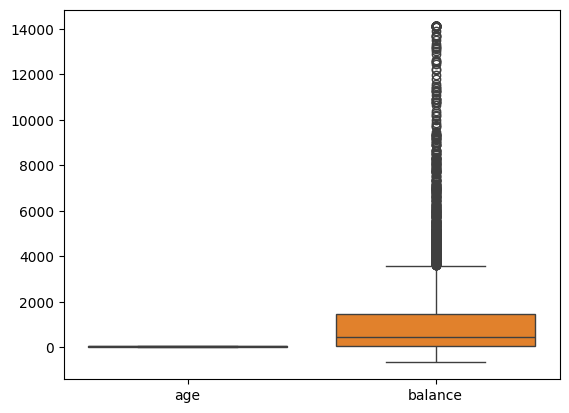

In [79]:

df.replace('unknown', pd.NA, inplace=True)
df.replace('unknown', pd.NA, inplace=True)
print(df.isna().sum())
# Optional: Drop rows or impute after checking counts

# feature engineering and cleanup
for col in ['balance', 'age']:
    upper = df[col].quantile(0.99)
    lower = df[col].quantile(0.01)
    df[col] = np.clip(df[col], lower, upper)
    # df[col] = np.where(df[col] > upper, upper, df[col])

# df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])
df['has_prev_contact'] = (df['previous'] > 0).astype(int)


for col in ['job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_secondary']:
    df[col] = df[col].astype('category')

df = df.drop_duplicates()

# Plot
sns.boxplot(data=df[['age',  'balance']])
plt.show()




In [80]:
# Define features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [89]:

#Class Imbalance MitigationClass weighting:

LogisticRegression(class_weight='balanced')

# Label Encoding for binary target variable
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

# Convert categorical variables to dummies
df_encoded = pd.get_dummies(df.drop('y', axis=1), drop_first=True)
df_encoded['y'] = df['y']

# X, y data
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Encode binary target
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])  # 'yes' → 1, 'no' → 0

# One-hot encode categorical features
df_encoded = pd.get_dummies(df.drop('y', axis=1), drop_first=True)
df_encoded['y'] = df['y']




In [90]:

# Define features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [92]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [91]:

# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [93]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [94]:

## Modeling and Evaluation
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True)
}

In [95]:

#Score model
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = cross_val_score(model, X_train_scaled, y_train, cv=5).mean()
    results[name] = {
        "CV Score": score,
        "Report": classification_report(y_test, y_pred, output_dict=True),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }


In [88]:

#Grid Search Ea. Model Find best params
# 1. KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)
print("Best KNN params:", knn_grid.best_params_)
print("KNN best CV score:", knn_grid.best_score_)
print("KNN test score:", knn_grid.score(X_test_scaled, y_test))


# 2. Logistic Regression
logreg_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}
logreg_grid = GridSearchCV(LogisticRegression(max_iter=1000), logreg_params, cv=5, scoring='accuracy')
logreg_grid.fit(X_train_scaled, y_train)
print("Best Logistic Regression params:", logreg_grid.best_params_)
print("Logistic Regression best CV score:", logreg_grid.best_score_)
print("Logistic Regression test score:", logreg_grid.score(X_test_scaled, y_test))

# 3. Decision Tree
tree_params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}
tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=5, scoring='accuracy')
tree_grid.fit(X_train_scaled, y_train)
print("Best Decision Tree params:", tree_grid.best_params_)
print("Decision Tree best CV score:", tree_grid.best_score_)
print("Decision Tree test score:", tree_grid.score(X_test_scaled, y_test))

# 4. SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
svm_grid = GridSearchCV(SVC(probability=True), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train_scaled, y_train)
print("Best SVM params:", svm_grid.best_params_)
print("SVM best CV score:", svm_grid.best_score_)
print("SVM test score:", svm_grid.score(X_test_scaled, y_test))



Best KNN params: {'n_neighbors': 7, 'weights': 'distance'}
KNN best CV score: 0.9098389982110913
KNN test score: 0.8504053058216654
Best Logistic Regression params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression best CV score: 0.9119856887298748
Logistic Regression test score: 0.8828297715549005
Best Decision Tree params: {'max_depth': 10, 'min_samples_split': 2}
Decision Tree best CV score: 0.874597495527728
Decision Tree test score: 0.8754605747973471
Best SVM params: {'C': 1, 'kernel': 'rbf'}
SVM best CV score: 0.9175313059033992
SVM test score: 0.8865143699336773


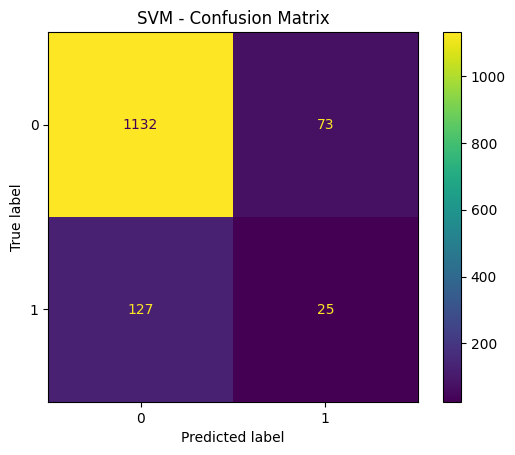

In [48]:

#SVM Confusion Matrics
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svm_grid, X_test_scaled, y_test)
plt.title("SVM - Confusion Matrix")
plt.show()

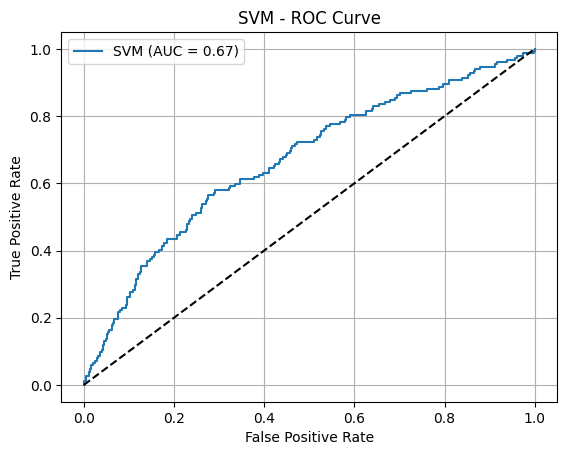

In [49]:
from sklearn.metrics import roc_curve, auc

y_probs = svm_grid.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM - ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

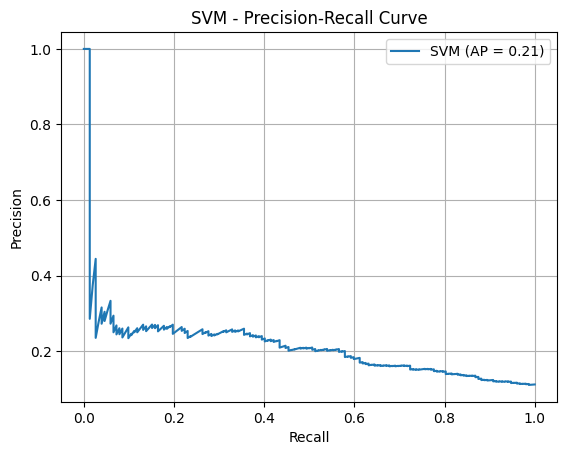

In [50]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_probs)
ap_score = average_precision_score(y_test, y_probs)

plt.plot(recall, precision, label=f'SVM (AP = {ap_score:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("SVM - Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# Print summary
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"Cross-Validation Score: {metrics['CV Score']:.4f}")
    print("Classification Report:")
    print(pd.DataFrame(metrics['Report']).transpose())
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])


Model: KNN
Cross-Validation Score: 0.9020
Classification Report:
              precision    recall  f1-score      support
0              0.906457  0.908714  0.907584  1205.000000
1              0.261745  0.256579  0.259136   152.000000
accuracy       0.835667  0.835667  0.835667     0.835667
macro avg      0.584101  0.582646  0.583360  1357.000000
weighted avg   0.834242  0.835667  0.834950  1357.000000
Confusion Matrix:
[[1095  110]
 [ 113   39]]

Model: Logistic Regression
Cross-Validation Score: 0.8961
Classification Report:
              precision    recall  f1-score      support
0              0.900000  0.926141  0.912883  1205.000000
1              0.239316  0.184211  0.208178   152.000000
accuracy       0.843036  0.843036  0.843036     0.843036
macro avg      0.569658  0.555176  0.560531  1357.000000
weighted avg   0.825996  0.843036  0.833948  1357.000000
Confusion Matrix:
[[1116   89]
 [ 124   28]]

Model: Decision Tree
Cross-Validation Score: 0.8737
Classification Report:
  

In [52]:

# Tree, HyperParams & fit
# Example: A small tree to demonstrate underfitting/overfitting control
tree_overfit = DecisionTreeClassifier(max_depth=2, min_samples_split=2, min_samples_leaf=1, random_state=42)
tree_overfit.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [53]:
# SCORE
train_acc = tree_overfit.score(X_train, y_train)
test_acc = tree_overfit.score(X_test, y_test)
print(f"\nDecision Tree (depth=2) Train Accuracy: {train_acc:.4f}")
print(f"Decision Tree (depth=2) Test Accuracy: {test_acc:.4f}")


Decision Tree (depth=2) Train Accuracy: 0.7338
Decision Tree (depth=2) Test Accuracy: 0.6706


In [54]:
# ROC Curve for 2nd best Model: Logistic Regression   Cross-Validation Score: 0.8961
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train_scaled, y_train)
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

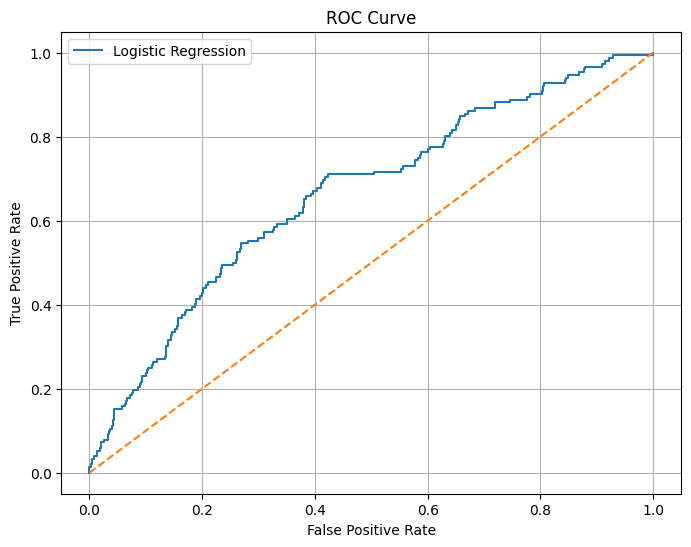

In [55]:

# PLot ROC for Logistict Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [56]:

Essential step for logistic regression, SVM, etc.

df = pd.get_dummies(df, drop_first=True)

Prints the proportion of class labels in y
print(df['y'].value_counts(normalize=True))  # Class balance
print(df.corr())

# print(df.describe())
print(df['y'].value_counts())
print(df.corr(numeric_only=True))
for col in ['job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_secondary']:
    print(df[col].value_counts())

y
0    0.88476
1    0.11524
Name: proportion, dtype: float64
                          age   balance       day  campaign     pdays  \
age                  1.000000  0.083820 -0.017853 -0.005148 -0.008894   
balance              0.083820  1.000000 -0.008677 -0.009976  0.009437   
day                 -0.017853 -0.008677  1.000000  0.160706 -0.094352   
campaign            -0.005148 -0.009976  0.160706  1.000000 -0.093137   
pdays               -0.008894  0.009437 -0.094352 -0.093137  1.000000   
previous            -0.003511  0.026196 -0.059114 -0.067833  0.577562   
y                    0.045092  0.017905 -0.011244 -0.061147  0.104087   
job_blue-collar     -0.049307 -0.057691 -0.027025  0.008783  0.009374   
job_entrepreneur     0.015638  0.014523 -0.015707 -0.012910 -0.014704   
job_housemaid        0.092979  0.035016 -0.011995 -0.015051 -0.021278   
job_management      -0.031083  0.059753  0.021510  0.030158  0.006268   
job_retired          0.453171  0.068974 -0.010072 -0.024452 -0.

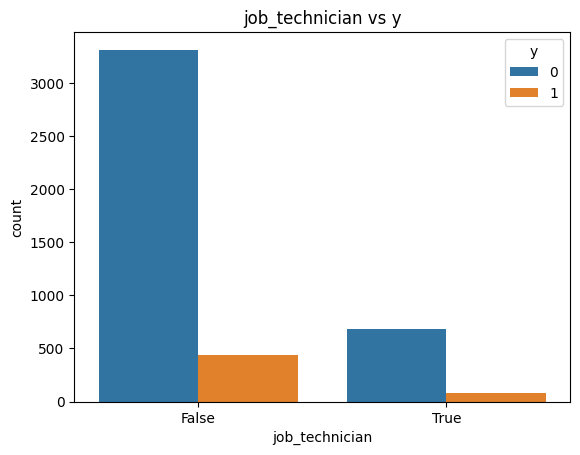

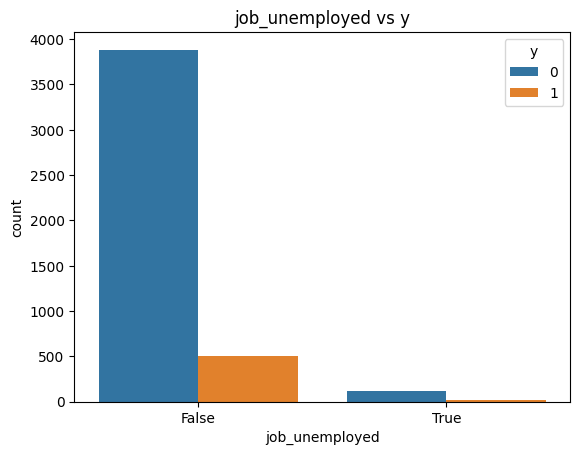

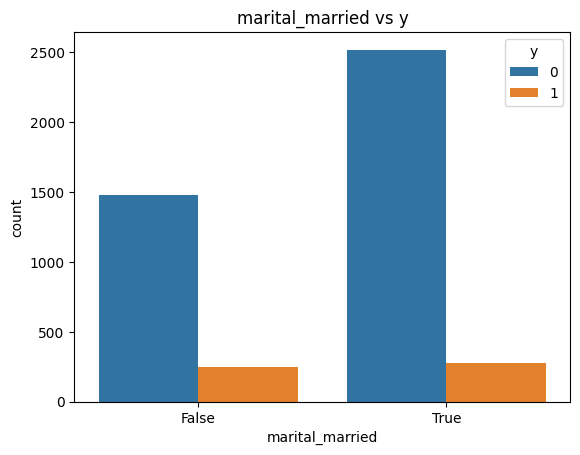

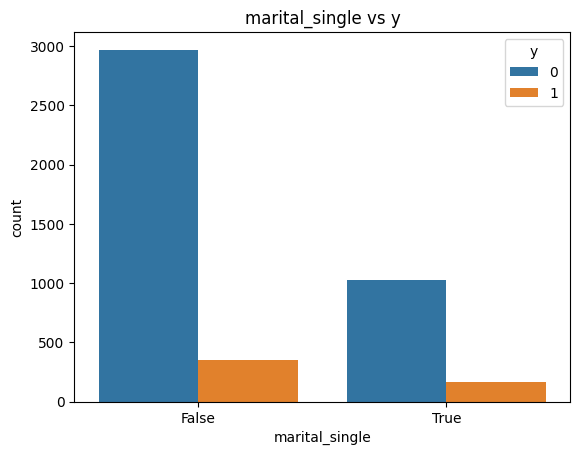

In [62]:
# job_technician Bar plot example
sns.countplot(x='job_technician', hue='y', data=df)
plt.title('job_technician vs y')
plt.show()



# job_unemployed Bar plot example
sns.countplot(x='job_unemployed', hue='y', data=df)
plt.title('job_unemployed vs y')
plt.show()


# marital_married Bar plot example
sns.countplot(x='marital_married', hue='y', data=df)
plt.title('marital_married vs y')
plt.show()


# marital_single Bar plot example
sns.countplot(x='marital_single', hue='y', data=df)
plt.title('marital_single vs y')
plt.show()

